In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# pandas is a python package for reading files and data manipulation like handling missing values, dropping daata....

In [2]:
# Importing the dataset
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
#Contents of dataset
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
#Retrieve years of experience
X = dataset.iloc[:, :-1]
#X = dataset['YearsExperience']
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [5]:
#Retrieve Salary
Y = dataset.iloc[:, -1:]
Y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


Text(0, 0.5, 'Salary')

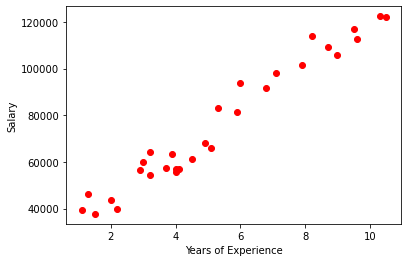

In [6]:
plt.scatter(X, Y, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [7]:
#Training dataset for training the model and then check the performance of the model on the test dataset.
#Use the train_test_split method from library model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3)
                                                                    #If data set contains 30 observations then 
                                                                    #Test set contains 10 observations
                                                                    #Training set contains 20 observations
X_train

,YearsExperience
2,1.5
28,10.3
20,6.8
4,2.2
17,5.3
16,5.1
29,10.5
22,7.9
15,4.9
13,4.1


In [8]:
X_test

,YearsExperience
9,3.7
12,4.0
1,1.3
23,8.2
24,8.7
27,9.6
19,6.0
18,5.9
11,4.0
14,4.5


In [9]:
y_train

,Salary
2,37731
28,122391
20,91738
4,39891
17,83088
16,66029
29,121872
22,101302
15,67938
13,57081


In [10]:
#To use the 'LinearRegression' class call it from the library sklearn.linear_model.
#First we create an object of the LinearRegression class and 
#call the fit method passing the X_train and y_train.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[26422.628353]
[[9306.28437623]]


In [12]:
  #regressor is used in previous step for training the moel. 
 #Now we will use it to predict the results of the test set and 
 #compare the predicted values with the actual values
y_pred = regressor.predict(X_test)


In [13]:
y_pred

array([[ 60855.88054506],
       [ 63647.76585793],
       [ 38520.7980421 ],
       [102734.1602381 ],
       [107387.30242621],
       [115762.95836482],
       [ 82260.33461039],
       [ 81329.70617277],
       [ 63647.76585793],
       [ 68300.90804604]])

In [14]:
y_test

,Salary
9,57189
12,56957
1,46205
23,113812
24,109431
27,112635
19,93940
18,81363
11,55794
14,61111


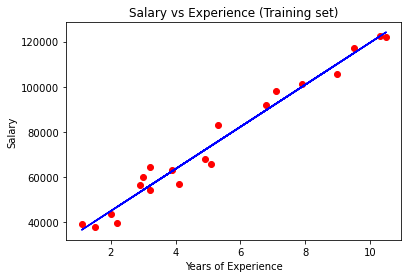

In [15]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

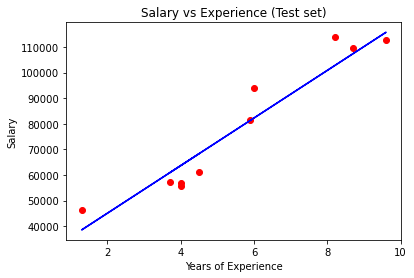

In [16]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
#Make new predictions for data points that do not exist in the dataset. 
#Like for a person with 12 years experience
new_salary_pred = regressor.predict([[14]])
print('The predicted salary of a person with 12 years experience is ',new_salary_pred)

The predicted salary of a person with 12 years experience is  [[156710.60962024]]


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

50373078.54765024

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.921211278681259

In [20]:
import pickle
pickle.dump(regressor, open("model.pkl", "wb"))